In [1]:
from FullBatchContinualEvolvingSNN import *
import arff
import warnings
from scipy.io import loadmat
warnings.filterwarnings("ignore")
%matplotlib inline
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')

## Load Data and Convert to Spikes

In [2]:
trainpath = '../datasets/enron/enron-train-mvmd.mat'
testpath = '../datasets/enron/enron-test-mvmd.mat'

train_ = loadmat(trainpath)
train_data, train_labels = train_['transformed_train_data'], np.array(train_['labels'])

test_ = loadmat(testpath)
test_data, test_labels = test_['transformed_test_data'], np.array(test_['labels'])

a = train_data.max(axis=0)
b = train_data.min(axis=0)

# delete_indices = [0, 12, 15]
# train_labels = np.delete(train_labels, delete_indices, 1)
# test_labels = np.delete(test_labels, delete_indices, 1)

train_spikes = encoding(train_data, device, a, b)
test_spikes = encoding(test_data, device, a, b)
print("Train data shape: ", np.array(train_spikes).shape)
print("Train labels shape: ", np.array(train_labels).shape)
print("Test data shape: ", np.array(test_spikes).shape)
print("Test labels shape: ", np.array(test_labels).shape)

100%|██████████| 579/579 [00:00<00:00, 8328.88it/s]

Train data shape:  (1123, 1, 120)
Train labels shape:  (1123, 53)
Test data shape:  (579, 1, 120)
Test labels shape:  (579, 53)


## CIFDM Training and Evaluation Mode

Training and Evaluating on task 1
Train data shape is  torch.Size([112, 1, 120])
Train Labels shape is  torch.Size([112, 5])
Classes trained are: 0 to 5


  0%|          | 6/2500 [00:00<00:49, 50.39it/s]

Class 0, class 1 neurons = 1, class 0 neurons = 5
Class 1, class 1 neurons = 1, class 0 neurons = 4
Class 2, class 1 neurons = 1, class 0 neurons = 5
Class 3, class 1 neurons = 1, class 0 neurons = 5
Class 4, class 1 neurons = 1, class 0 neurons = 4


100%|██████████| 2500/2500 [00:56<00:00, 44.22it/s]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int32
(579, 5) (579, 5)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.0262522 |
| zero_one_loss       | 0.127807  |
| one_error           | 0         |
| micro av. jaccard   | 0         |
| macro av. jaccard   | 0         |
| micro av. precision | 0         |
| macro av. precision | 0         |
| micro av. recall    | 0         |
| macro av. recall    | 0         |
| micro av. f1        | 0         |
| macro av. f1        | 0         |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int32
(579, 5) (579, 5)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.0262522 |
| zero_one_loss       | 0.127807  |
| one_error           | 0         |
| micro av. jaccard   | 0         |
| macro av. jaccard   | 0         |
| micro av. precision | 0         |
| macro av. pr

  0%|          | 3/2500 [00:00<01:54, 21.90it/s]

Class 0, class 1 neurons = 1, class 0 neurons = 6
Class 1, class 1 neurons = 1, class 0 neurons = 5
Class 2, class 1 neurons = 1, class 0 neurons = 6
Class 3, class 1 neurons = 1, class 0 neurons = 6
Class 4, class 1 neurons = 1, class 0 neurons = 5
Class 5, class 1 neurons = 2, class 0 neurons = 3
Class 6, class 1 neurons = 2, class 0 neurons = 2
Class 7, class 1 neurons = 1, class 0 neurons = 3
Class 8, class 1 neurons = 1, class 0 neurons = 3
Class 9, class 1 neurons = 1, class 0 neurons = 3


100%|██████████| 2500/2500 [01:50<00:00, 22.54it/s]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int32
(579, 5) (579, 5)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.121244  |
| zero_one_loss       | 0.578584  |
| one_error           | 0         |
| micro av. jaccard   | 0.179907  |
| macro av. jaccard   | 0.0405263 |
| micro av. precision | 0.534722  |
| macro av. precision | 0.106944  |
| micro av. recall    | 0.213296  |
| macro av. recall    | 0.0492013 |
| micro av. f1        | 0.30495   |
| macro av. f1        | 0.0673961 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int32
(579, 10) (579, 10)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.0737478 |
| zero_one_loss       | 0.626943  |
| one_error           | 0         |
| micro av. jaccard   | 0.152778  |
| macro av. jaccard   | 0.0202632 |
| micro av. precision | 0.534722  |
| macro av. 

  0%|          | 2/2500 [00:00<02:21, 17.66it/s]

Class 0, class 1 neurons = 1, class 0 neurons = 6
Class 1, class 1 neurons = 1, class 0 neurons = 5
Class 2, class 1 neurons = 1, class 0 neurons = 6
Class 3, class 1 neurons = 1, class 0 neurons = 6
Class 4, class 1 neurons = 1, class 0 neurons = 5
Class 5, class 1 neurons = 2, class 0 neurons = 5
Class 6, class 1 neurons = 3, class 0 neurons = 4
Class 7, class 1 neurons = 1, class 0 neurons = 5
Class 8, class 1 neurons = 1, class 0 neurons = 5
Class 9, class 1 neurons = 1, class 0 neurons = 5
Class 10, class 1 neurons = 1, class 0 neurons = 5
Class 11, class 1 neurons = 1, class 0 neurons = 3
Class 12, class 1 neurons = 1, class 0 neurons = 5
Class 13, class 1 neurons = 1, class 0 neurons = 5
Class 14, class 1 neurons = 5, class 0 neurons = 1


100%|██████████| 2500/2500 [02:40<00:00, 15.56it/s]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int32
(579, 5) (579, 5)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.201382 |
| zero_one_loss       | 0.846287 |
| one_error           | 0        |
| micro av. jaccard   | 0        |
| macro av. jaccard   | 0        |
| micro av. precision | 0        |
| macro av. precision | 0        |
| micro av. recall    | 0        |
| macro av. recall    | 0        |
| micro av. f1        | 0        |
| macro av. f1        | 0        |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int32
(579, 15) (579, 15)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.116292  |
| zero_one_loss       | 0.944732  |
| one_error           | 0         |
| micro av. jaccard   | 0.0595903 |
| macro av. jaccard   | 0.0116258 |
| micro av. precision | 0.542373  |
| macro av. precision | 0

  0%|          | 2/2500 [00:00<03:09, 13.16it/s]

Class 0, class 1 neurons = 1, class 0 neurons = 7
Class 1, class 1 neurons = 1, class 0 neurons = 6
Class 2, class 1 neurons = 1, class 0 neurons = 7
Class 3, class 1 neurons = 1, class 0 neurons = 7
Class 4, class 1 neurons = 1, class 0 neurons = 6
Class 5, class 1 neurons = 2, class 0 neurons = 6
Class 6, class 1 neurons = 4, class 0 neurons = 7
Class 7, class 1 neurons = 1, class 0 neurons = 6
Class 8, class 1 neurons = 1, class 0 neurons = 6
Class 9, class 1 neurons = 1, class 0 neurons = 6
Class 10, class 1 neurons = 1, class 0 neurons = 8
Class 11, class 1 neurons = 1, class 0 neurons = 6
Class 12, class 1 neurons = 1, class 0 neurons = 8
Class 13, class 1 neurons = 1, class 0 neurons = 8
Class 14, class 1 neurons = 5, class 0 neurons = 5
Class 15, class 1 neurons = 1, class 0 neurons = 5
Class 16, class 1 neurons = 2, class 0 neurons = 5
Class 17, class 1 neurons = 1, class 0 neurons = 5
Class 18, class 1 neurons = 1, class 0 neurons = 5
Class 19, class 1 neurons = 1, class 0 ne

100%|██████████| 2500/2500 [03:09<00:00, 13.19it/s]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int32
(579, 5) (579, 5)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.52677   |
| zero_one_loss       | 0.91019   |
| one_error           | 0.122625  |
| micro av. jaccard   | 0.0167634 |
| macro av. jaccard   | 0.0167694 |
| micro av. precision | 0.0169824 |
| macro av. precision | 0.0169947 |
| micro av. recall    | 0.565217  |
| macro av. recall    | 0.570574  |
| micro av. f1        | 0.032974  |
| macro av. f1        | 0.0328023 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int32
(579, 20) (579, 20)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.334801  |
| zero_one_loss       | 1         |
| one_error           | 0         |
| micro av. jaccard   | 0.167669  |
| macro av. jaccard   | 0.076396  |
| micro av. precision | 0.178596  |
| macro av. 

  0%|          | 2/2500 [00:00<03:53, 10.69it/s]

Class 0, class 1 neurons = 1, class 0 neurons = 7
Class 1, class 1 neurons = 1, class 0 neurons = 6
Class 2, class 1 neurons = 1, class 0 neurons = 7
Class 3, class 1 neurons = 1, class 0 neurons = 7
Class 4, class 1 neurons = 1, class 0 neurons = 6
Class 5, class 1 neurons = 2, class 0 neurons = 6
Class 6, class 1 neurons = 5, class 0 neurons = 7
Class 7, class 1 neurons = 1, class 0 neurons = 6
Class 8, class 1 neurons = 1, class 0 neurons = 6
Class 9, class 1 neurons = 1, class 0 neurons = 6
Class 10, class 1 neurons = 3, class 0 neurons = 8
Class 11, class 1 neurons = 3, class 0 neurons = 6
Class 12, class 1 neurons = 3, class 0 neurons = 8
Class 13, class 1 neurons = 3, class 0 neurons = 8
Class 14, class 1 neurons = 6, class 0 neurons = 5
Class 15, class 1 neurons = 2, class 0 neurons = 5
Class 16, class 1 neurons = 4, class 0 neurons = 5
Class 17, class 1 neurons = 3, class 0 neurons = 5
Class 18, class 1 neurons = 3, class 0 neurons = 5
Class 19, class 1 neurons = 2, class 0 ne

100%|██████████| 2500/2500 [03:56<00:00, 10.58it/s]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int32
(579, 5) (579, 5)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.94266   |
| zero_one_loss       | 1         |
| one_error           | 0.73057   |
| micro av. jaccard   | 0.0573402 |
| macro av. jaccard   | 0.0573402 |
| micro av. precision | 0.0573402 |
| macro av. precision | 0.0573402 |
| micro av. recall    | 1         |
| macro av. recall    | 1         |
| micro av. f1        | 0.108461  |
| macro av. f1        | 0.106867  |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int32
(579, 25) (579, 25)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.418446  |
| zero_one_loss       | 1         |
| one_error           | 0         |
| micro av. jaccard   | 0.126478  |
| macro av. jaccard   | 0.0697191 |
| micro av. precision | 0.133303  |
| macro av. 

  0%|          | 1/2500 [00:00<04:41,  8.89it/s]

Class 0, class 1 neurons = 1, class 0 neurons = 7
Class 1, class 1 neurons = 1, class 0 neurons = 6
Class 2, class 1 neurons = 1, class 0 neurons = 7
Class 3, class 1 neurons = 1, class 0 neurons = 7
Class 4, class 1 neurons = 1, class 0 neurons = 6
Class 5, class 1 neurons = 2, class 0 neurons = 6
Class 6, class 1 neurons = 7, class 0 neurons = 7
Class 7, class 1 neurons = 1, class 0 neurons = 6
Class 8, class 1 neurons = 1, class 0 neurons = 6
Class 9, class 1 neurons = 1, class 0 neurons = 6
Class 10, class 1 neurons = 3, class 0 neurons = 8
Class 11, class 1 neurons = 4, class 0 neurons = 6
Class 12, class 1 neurons = 4, class 0 neurons = 8
Class 13, class 1 neurons = 3, class 0 neurons = 8
Class 14, class 1 neurons = 6, class 0 neurons = 5
Class 15, class 1 neurons = 3, class 0 neurons = 5
Class 16, class 1 neurons = 4, class 0 neurons = 6
Class 17, class 1 neurons = 4, class 0 neurons = 6
Class 18, class 1 neurons = 3, class 0 neurons = 6
Class 19, class 1 neurons = 2, class 0 ne

100%|██████████| 2500/2500 [04:45<00:00,  8.75it/s]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int32
(579, 5) (579, 5)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.728152  |
| zero_one_loss       | 1         |
| one_error           | 0.0431779 |
| micro av. jaccard   | 0.102215  |
| macro av. jaccard   | 0.0829016 |
| micro av. precision | 0.103627  |
| macro av. precision | 0.0829016 |
| micro av. recall    | 0.882353  |
| macro av. recall    | 0.8       |
| micro av. f1        | 0.185471  |
| macro av. f1        | 0.121887  |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int32
(579, 30) (579, 30)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.408175  |
| zero_one_loss       | 1         |
| one_error           | 0         |
| micro av. jaccard   | 0.13134   |
| macro av. jaccard   | 0.0713528 |
| micro av. precision | 0.13868   |
| macro av. 

  0%|          | 1/2500 [00:00<05:30,  7.55it/s]

Class 0, class 1 neurons = 1, class 0 neurons = 7
Class 1, class 1 neurons = 1, class 0 neurons = 6
Class 2, class 1 neurons = 1, class 0 neurons = 7
Class 3, class 1 neurons = 1, class 0 neurons = 7
Class 4, class 1 neurons = 1, class 0 neurons = 6
Class 5, class 1 neurons = 2, class 0 neurons = 6
Class 6, class 1 neurons = 7, class 0 neurons = 7
Class 7, class 1 neurons = 1, class 0 neurons = 6
Class 8, class 1 neurons = 1, class 0 neurons = 6
Class 9, class 1 neurons = 1, class 0 neurons = 6
Class 10, class 1 neurons = 3, class 0 neurons = 8
Class 11, class 1 neurons = 4, class 0 neurons = 6
Class 12, class 1 neurons = 4, class 0 neurons = 8
Class 13, class 1 neurons = 3, class 0 neurons = 8
Class 14, class 1 neurons = 6, class 0 neurons = 5
Class 15, class 1 neurons = 3, class 0 neurons = 5
Class 16, class 1 neurons = 4, class 0 neurons = 6
Class 17, class 1 neurons = 4, class 0 neurons = 6
Class 18, class 1 neurons = 3, class 0 neurons = 6
Class 19, class 1 neurons = 3, class 0 ne

100%|██████████| 2500/2500 [05:26<00:00,  7.65it/s]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int32
(579, 5) (579, 5)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.0138169 |
| zero_one_loss       | 0.0673575 |
| one_error           | 0         |
| micro av. jaccard   | 0         |
| macro av. jaccard   | 0         |
| micro av. precision | 0         |
| macro av. precision | 0         |
| micro av. recall    | 0         |
| macro av. recall    | 0         |
| micro av. f1        | 0         |
| macro av. f1        | 0         |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int32
(579, 35) (579, 35)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.297261  |
| zero_one_loss       | 1         |
| one_error           | 0         |
| micro av. jaccard   | 0.129228  |
| macro av. jaccard   | 0.0542357 |
| micro av. precision | 0.142629  |
| macro av. 

  0%|          | 1/2500 [00:00<06:22,  6.53it/s]

Class 0, class 1 neurons = 1, class 0 neurons = 7
Class 1, class 1 neurons = 1, class 0 neurons = 6
Class 2, class 1 neurons = 1, class 0 neurons = 7
Class 3, class 1 neurons = 1, class 0 neurons = 7
Class 4, class 1 neurons = 1, class 0 neurons = 6
Class 5, class 1 neurons = 2, class 0 neurons = 6
Class 6, class 1 neurons = 7, class 0 neurons = 7
Class 7, class 1 neurons = 1, class 0 neurons = 6
Class 8, class 1 neurons = 1, class 0 neurons = 6
Class 9, class 1 neurons = 1, class 0 neurons = 6
Class 10, class 1 neurons = 3, class 0 neurons = 8
Class 11, class 1 neurons = 5, class 0 neurons = 6
Class 12, class 1 neurons = 4, class 0 neurons = 8
Class 13, class 1 neurons = 4, class 0 neurons = 8
Class 14, class 1 neurons = 6, class 0 neurons = 5
Class 15, class 1 neurons = 3, class 0 neurons = 5
Class 16, class 1 neurons = 4, class 0 neurons = 6
Class 17, class 1 neurons = 5, class 0 neurons = 6
Class 18, class 1 neurons = 4, class 0 neurons = 6
Class 19, class 1 neurons = 3, class 0 ne

100%|██████████| 2500/2500 [06:16<00:00,  6.63it/s]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int32
(579, 5) (579, 5)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.946114  |
| zero_one_loss       | 1         |
| one_error           | 0.746114  |
| micro av. jaccard   | 0.0352237 |
| macro av. jaccard   | 0.0373902 |
| micro av. precision | 0.0353357 |
| macro av. precision | 0.0379058 |
| micro av. recall    | 0.917431  |
| macro av. recall    | 0.97907   |
| micro av. f1        | 0.0680504 |
| macro av. f1        | 0.0670035 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int32
(579, 40) (579, 40)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.403109  |
| zero_one_loss       | 1         |
| one_error           | 0         |
| micro av. jaccard   | 0.101962  |
| macro av. jaccard   | 0.0568019 |
| micro av. precision | 0.10813   |
| macro av. 

  0%|          | 1/2500 [00:00<06:59,  5.96it/s]

Class 0, class 1 neurons = 1, class 0 neurons = 7
Class 1, class 1 neurons = 1, class 0 neurons = 6
Class 2, class 1 neurons = 1, class 0 neurons = 7
Class 3, class 1 neurons = 1, class 0 neurons = 7
Class 4, class 1 neurons = 1, class 0 neurons = 6
Class 5, class 1 neurons = 2, class 0 neurons = 6
Class 6, class 1 neurons = 7, class 0 neurons = 7
Class 7, class 1 neurons = 1, class 0 neurons = 6
Class 8, class 1 neurons = 1, class 0 neurons = 6
Class 9, class 1 neurons = 1, class 0 neurons = 6
Class 10, class 1 neurons = 3, class 0 neurons = 8
Class 11, class 1 neurons = 5, class 0 neurons = 6
Class 12, class 1 neurons = 4, class 0 neurons = 8
Class 13, class 1 neurons = 4, class 0 neurons = 8
Class 14, class 1 neurons = 6, class 0 neurons = 5
Class 15, class 1 neurons = 4, class 0 neurons = 5
Class 16, class 1 neurons = 4, class 0 neurons = 6
Class 17, class 1 neurons = 5, class 0 neurons = 6
Class 18, class 1 neurons = 4, class 0 neurons = 6
Class 19, class 1 neurons = 3, class 0 ne

100%|██████████| 2500/2500 [06:57<00:00,  5.99it/s]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int32
(579, 5) (579, 5)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.0345423 |
| zero_one_loss       | 0.165803  |
| one_error           | 0         |
| micro av. jaccard   | 0         |
| macro av. jaccard   | 0         |
| micro av. precision | 0         |
| macro av. precision | 0         |
| micro av. recall    | 0         |
| macro av. recall    | 0         |
| micro av. f1        | 0         |
| macro av. f1        | 0         |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int32
(579, 45) (579, 45)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.363155  |
| zero_one_loss       | 1         |
| one_error           | 0         |
| micro av. jaccard   | 0.0995432 |
| macro av. jaccard   | 0.0505134 |
| micro av. precision | 0.106724  |
| macro av. 

  0%|          | 0/2500 [00:00<?, ?it/s]

Class 0, class 1 neurons = 1, class 0 neurons = 8
Class 1, class 1 neurons = 1, class 0 neurons = 7
Class 2, class 1 neurons = 1, class 0 neurons = 8
Class 3, class 1 neurons = 1, class 0 neurons = 8
Class 4, class 1 neurons = 1, class 0 neurons = 7
Class 5, class 1 neurons = 2, class 0 neurons = 7
Class 6, class 1 neurons = 7, class 0 neurons = 7
Class 7, class 1 neurons = 1, class 0 neurons = 7
Class 8, class 1 neurons = 1, class 0 neurons = 7
Class 9, class 1 neurons = 1, class 0 neurons = 7
Class 10, class 1 neurons = 3, class 0 neurons = 8
Class 11, class 1 neurons = 6, class 0 neurons = 6
Class 12, class 1 neurons = 4, class 0 neurons = 8
Class 13, class 1 neurons = 4, class 0 neurons = 8
Class 14, class 1 neurons = 7, class 0 neurons = 5
Class 15, class 1 neurons = 5, class 0 neurons = 6
Class 16, class 1 neurons = 4, class 0 neurons = 6
Class 17, class 1 neurons = 5, class 0 neurons = 7
Class 18, class 1 neurons = 4, class 0 neurons = 6
Class 19, class 1 neurons = 3, class 0 ne

100%|██████████| 2500/2500 [08:22<00:00,  4.97it/s]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int32
(579, 8) (579, 8)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.0418826 |
| zero_one_loss       | 0.310881  |
| one_error           | 0         |
| micro av. jaccard   | 0         |
| macro av. jaccard   | 0         |
| micro av. precision | 0         |
| macro av. precision | 0         |
| micro av. recall    | 0         |
| macro av. recall    | 0         |
| micro av. f1        | 0         |
| macro av. f1        | 0         |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int32
(579, 53) (579, 53)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.307981  |
| zero_one_loss       | 1         |
| one_error           | 0         |
| micro av. jaccard   | 0.10264   |
| macro av. jaccard   | 0.0476173 |
| micro av. precision | 0.111835  |
| macro av. 

<Figure size 432x288 with 0 Axes>

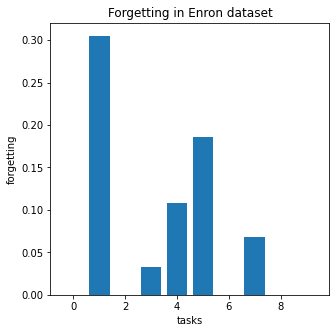

In [3]:
hparams_dict = {
    'inputs': 120,
    'outputs': 53,
    'time_constant': 300,
    'alpha_a': 0.42,
    'alpha_m': 0.07,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 1e-4, #5e-4,
    'sim_time': 600,
    'n_epochs': 2500,
    'print_every': 500,
    'name': 'Enron',
    'tasks': {'samples': [112]*9 + [115], 'labels': [5]*9 + [8]},
    'seed': 2,
    'add_extra_neuron': True,
    'ckpt_dir': './checkpoints/enron/mvmd',
    'load_from_file': None,
    'device': device
}
net = OverallSNN(hparams_dict)
net.fit_and_evaluate(train_spikes, train_labels, test_spikes, test_labels)